# **Importing Data and Initial Cleaning**

In [0]:
# Import Data
file = "dbfs:/FileStore/vgchartz_2024.csv"
DDLSchema = "Image string, title string, console string, genre string, publisher string, developer string, critic_score float, total_sales float, na_sales float, jp_sales float, pal_sales float, other_sales float, release_date string, last_update string"

vgchartz = spark.read.format("csv").load(file, schema=DDLSchema,header="true")

display(vgchartz)
vgchartz.printSchema()

In [0]:
#Convert to pandas dataframe, check info and final rows 
vgDF = vgchartz.toPandas()
vgDF.info()

vgDF.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image         64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float32
 7   total_sales   18922 non-null  float32
 8   na_sales      12637 non-null  float32
 9   jp_sales      6726 non-null   float32
 10  pal_sales     12824 non-null  float32
 11  other_sales   15128 non-null  float32
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float32(6), object(8)
memory usage: 5.4+ MB


,Image,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24
64015,/games/boxart/default.jpg,Yurukill: The Calumniation Games,PS4,Visual Novel,Unknown,G.rev Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-09-29


In [0]:
#Data cleaning
#Dropping unnecessary columns: image, last update

vgDF.drop(['Image','last_update'],axis=1,inplace=True)
display(vgDF)

In [0]:
#Recheck info after dropped columns
vgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float32
 6   total_sales   18922 non-null  float32
 7   na_sales      12637 non-null  float32
 8   jp_sales      6726 non-null   float32
 9   pal_sales     12824 non-null  float32
 10  other_sales   15128 non-null  float32
 11  release_date  56965 non-null  object 
dtypes: float32(6), object(6)
memory usage: 4.4+ MB


In [0]:
#Convert release date to datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
vgDF['release_date'] = pd.to_datetime(vgDF['release_date'],format='%Y-%m-%d')



# **Begin Visualizing Data**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vgDF.describe()


,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


**Univariate Analysis of Continuous Variables**

Out[7]: array([[<AxesSubplot:title={'center':'critic_score'}>,
        <AxesSubplot:title={'center':'total_sales'}>],
       [<AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'pal_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>],
       [<AxesSubplot:title={'center':'release_date'}>, <AxesSubplot:>]],
      dtype=object)

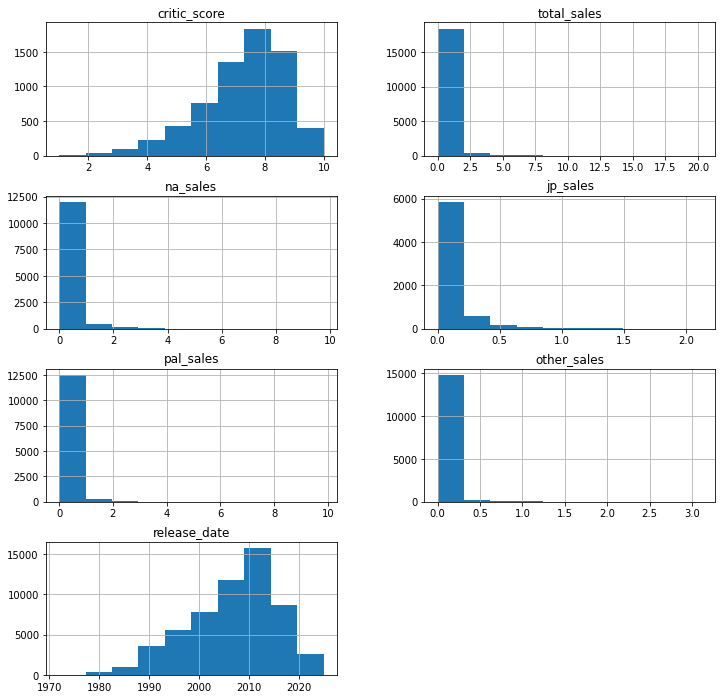

In [0]:
#Histograms
vgDF.hist(figsize=(12,12),layout=(4,2))


Out[8]: <AxesSubplot:>

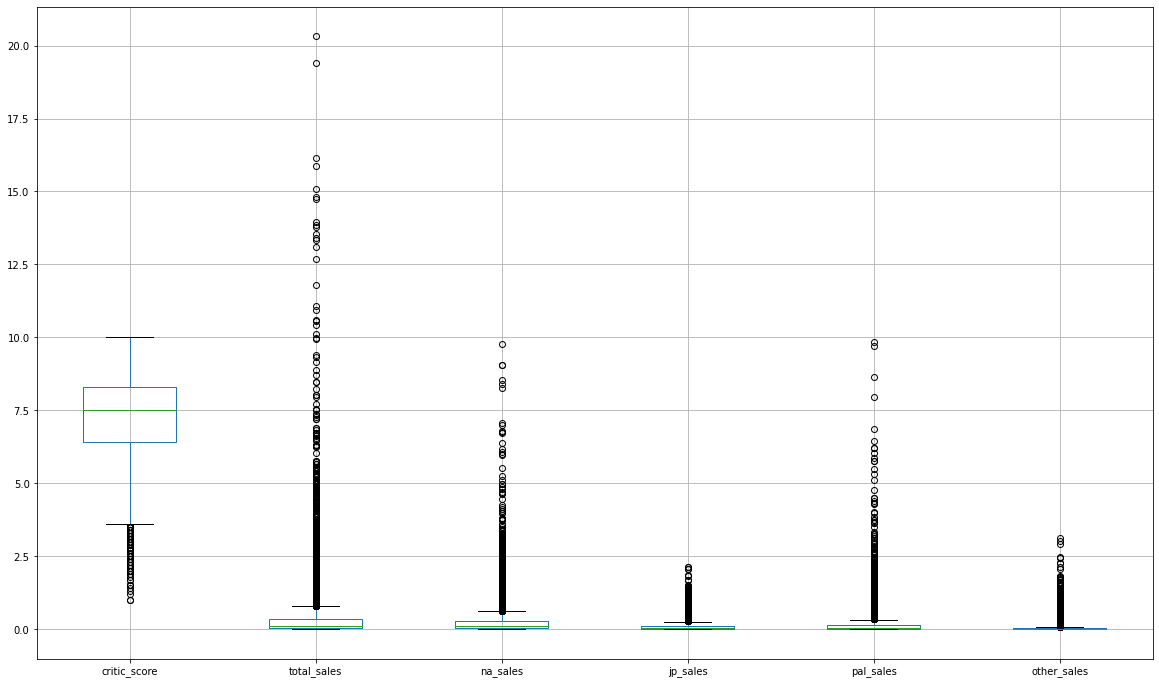

In [0]:
#Boxplots
vgDF.boxplot(figsize=(20,12))

Boxplots show a large number of outliers for each variable, next step is to visualize outliers

In [0]:
#Create temp table
vgchartz.drop('Image','last_update').createOrReplaceTempView("game_data")



In [0]:
%sql
--Query displaying outliers from total_sales, using 1.5*IQR calculated from descriptive statistics
--Q3=0.34, Q1=0.03 for total_sales
--IQR = 0.34 - 0.03 = 0.31, max outlier = 0.805, no min outlier

select title, console, publisher, developer, release_date, total_sales
from game_data
where total_sales >= 0.805
order by total_sales desc;


title,console,publisher,developer,release_date,total_sales
Grand Theft Auto V,PS3,Rockstar Games,Rockstar North,2013-09-17,20.32
Grand Theft Auto V,PS4,Rockstar Games,Rockstar North,2014-11-18,19.39
Grand Theft Auto: Vice City,PS2,Rockstar Games,Rockstar North,2002-10-28,16.15
Grand Theft Auto V,X360,Rockstar Games,Rockstar North,2013-09-17,15.86
Call of Duty: Black Ops 3,PS4,Activision,Treyarch,2015-11-06,15.09
Call of Duty: Modern Warfare 3,X360,Activision,Infinity Ward,2011-11-08,14.82
Call of Duty: Black Ops,X360,Activision,Treyarch,2010-11-09,14.74
Red Dead Redemption 2,PS4,Rockstar Games,Rockstar Games,2018-10-26,13.94
Call of Duty: Black Ops II,X360,Activision,Treyarch,2012-11-13,13.86
Call of Duty: Black Ops II,PS3,Activision,Treyarch,2012-11-13,13.8


In [0]:
%sql
--Query displaying outliers from critic score, using IQR calculated from descriptive statistics
--Q3=8.3, Q1=6.4 for critic_score
--IQR = 8.3 - 6.4 = 1.9, max outlier = 11.15, min outlier = 3.55

select distinct title, console, publisher, developer, release_date, critic_score
from game_data
where critic_score <= 3.55
order by critic_score desc;

title,console,publisher,developer,release_date,critic_score
E.T. The Extra-Terrestrial,GBA,NewKidCo,Fluid Studios,2001-12-14,3.5
Around the World in 80 Days,GBA,Hip Interactive,Saffire Corporation,2004-07-05,3.5
The Bible Game,GBA,Crave Entertainment,Crave Entertainment,2005-10-30,3.5
Animorphs: Shattered Reality,PS,Infogrames,Single Trac,2000-09-06,3.5
The Fairly Odd Parents: Clash with the Anti-World,GBA,THQ,THQ,2005-10-18,3.5
Dave Mirra BMX Challenge,PSP,Crave Entertainment,Left Field Productions,2006-11-02,3.5
Cartoon Network: Battle Crashers,3DS,GameMill Entertainment,Magic Pockets,2016-11-08,3.5
Justice League: Chronicles,GBA,Midway Games,Full Fat,2003-11-12,3.5
Driver: Renegade,3DS,Ubisoft,Ubisoft,2011-09-06,3.5
Bomberman: Act Zero,X360,Konami,Hudson Soft,2006-08-29,3.5


In [0]:
%sql
-- Looking for games with unknown publishers, want to see if developer is there
select title, console, publisher, developer, release_date, total_sales
from game_data
where publisher = "Unknown" and developer = "Unknown"

title,console,publisher,developer,release_date,total_sales
Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Unknown,Unknown,null,0.35
B.L.U.E.: Legend of Water,PS,Unknown,Unknown,null,0.04
Sengoku Otome: Legend Battle,PSV,Unknown,Unknown,2016-08-25,0.04
Shitsuji ga Aruji o Erabu Toki,PSV,Unknown,Unknown,2016-02-25,0.03
Omega Labyrinth Z,PSV,Unknown,Unknown,null,0.03
Kanji Calligraphy Training,DS,Unknown,Unknown,2008-03-13,0.02
Strawberry Nauts,PSV,Unknown,Unknown,2016-07-28,0.02
Dream Dancer,DS,Unknown,Unknown,null,0.02
PuraMai Wars V,PSV,Unknown,Unknown,2016-08-25,0.02
Possession Magenta,PSV,Unknown,Unknown,2015-05-28,0.01


**Univariate Analysis of Categorical Variables**

In [0]:
#Get Counts by Publisher
svgDF = spark.createDataFrame(vgDF)

pubData = svgDF.select("publisher").groupBy("publisher").count().orderBy("count",ascending = False).limit(30)

pubData = pubData.toPandas()
display(pubData)

publisher,count
Unknown,8842
Sega,2207
Ubisoft,1663
Electronic Arts,1619
Activision,1582
Konami,1544
Nintendo,1476
Sony Computer Entertainment,1372
Microsoft,1272
THQ,1111


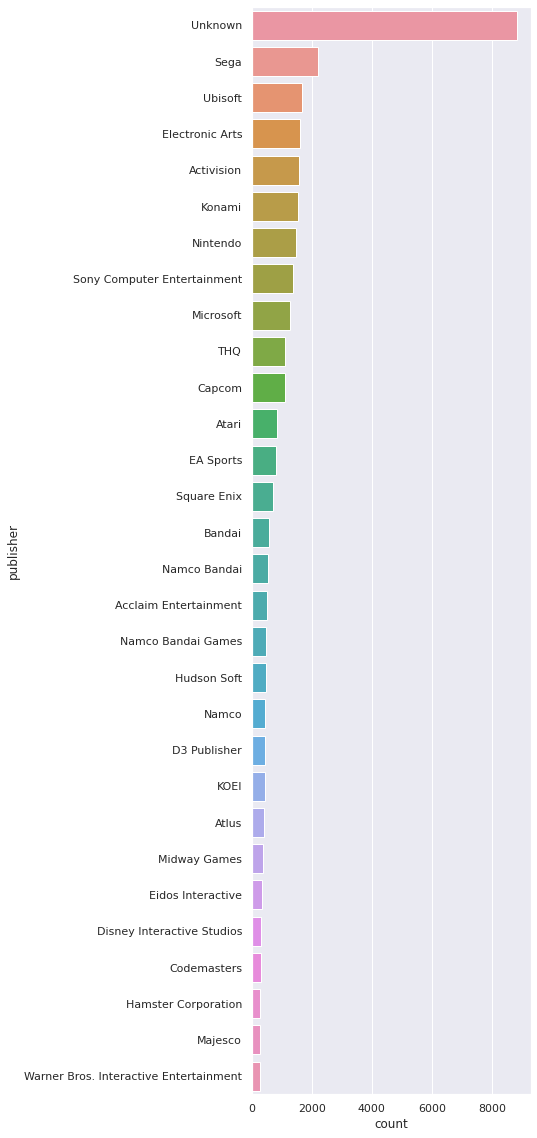

In [0]:
sns.set_theme(rc={'figure.figsize':(5,20)})
ax = sns.barplot(data=pubData,y="publisher",x="count",orient="h")
#ax.tick_params(axis='x',labelrotation=45)

In [0]:
#Get Counts by Developer
devData = svgDF.select("developer").groupBy("developer").count().orderBy("count",ascending = False).limit(20)

devData = devData.toPandas()
display(devData)

developer,count
Unknown,4435
Konami,976
Sega,915
Capcom,870
Namco,489
Square Enix,425
SNK Corporation,408
EA Canada,396
Hudson Soft,394
Ubisoft,377


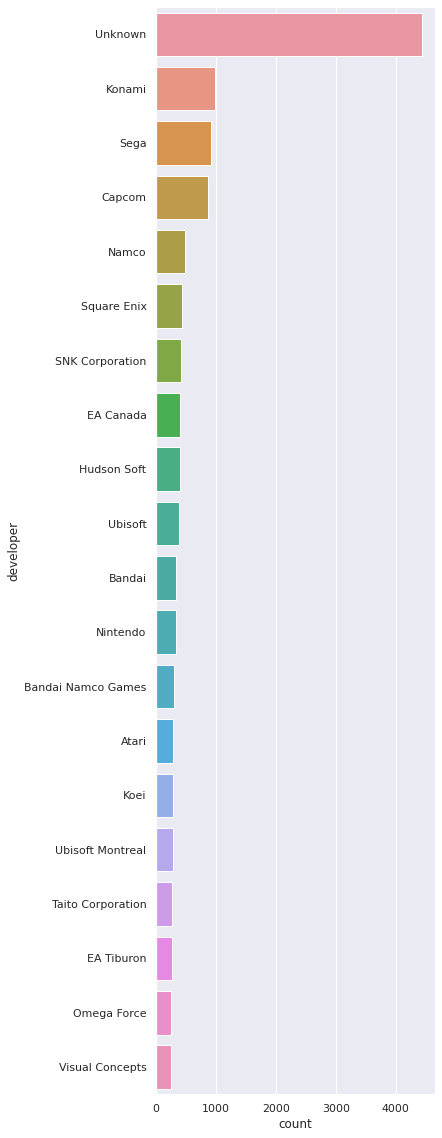

In [0]:
sns.set_theme(rc={'figure.figsize':(5,20)})
ax = sns.barplot(data=devData,y="developer",x="count",orient="h")
#ax.tick_params(axis='x',labelrotation=45)

In [0]:
#Get Counts by Genre
genData = svgDF.select("genre").groupBy("genre").count().orderBy("count",ascending = False)

genData = genData.toPandas()
display(genData)

genre,count
Misc,9304
Action,8557
Adventure,6260
Role-Playing,5721
Sports,5586
Shooter,5410
Platform,4001
Strategy,3685
Puzzle,3521
Racing,3425


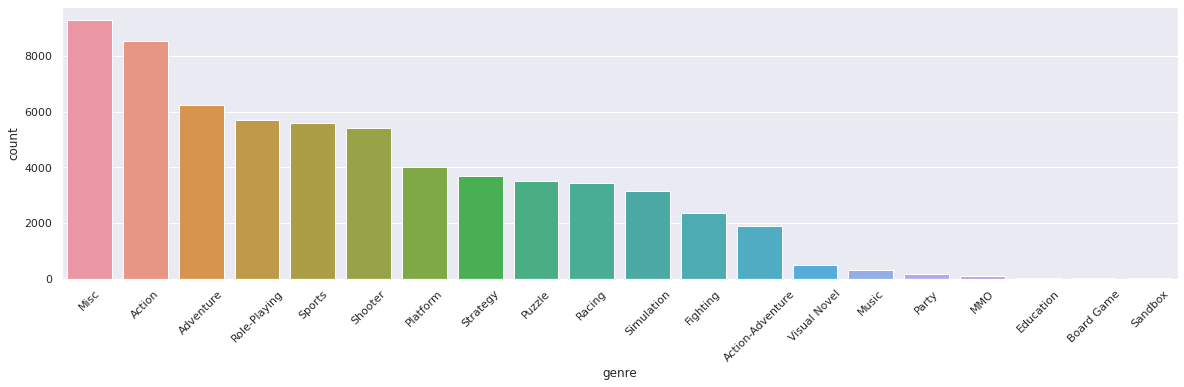

In [0]:
sns.set_theme(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=genData,x="genre",y="count")
ax.tick_params(axis='x',labelrotation=45)

In [0]:
#Get Counts by Console
conData = svgDF.select("console").groupBy("console").count().orderBy("count",ascending = False)

conData = conData.toPandas()
display(conData)

console,count
PC,12617
PS2,3565
DS,3288
PS4,2878
PS,2707
NS,2337
XBL,2120
PSN,2004
XOne,1963
PS3,1905


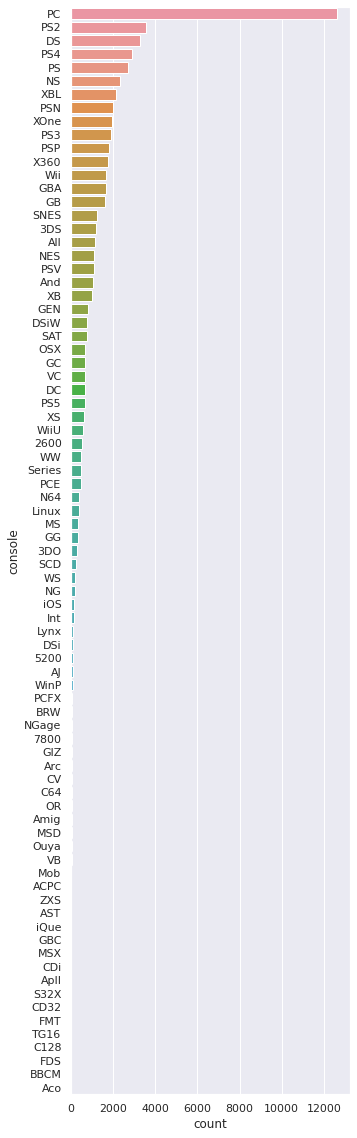

In [0]:
sns.set_theme(rc={'figure.figsize':(5,20)})
ax = sns.barplot(data=conData,x="count",y="console",orient="h")
#ax.tick_params(axis='x',labelrotation=45)

# **Bivariate and Multivariate Analyses**

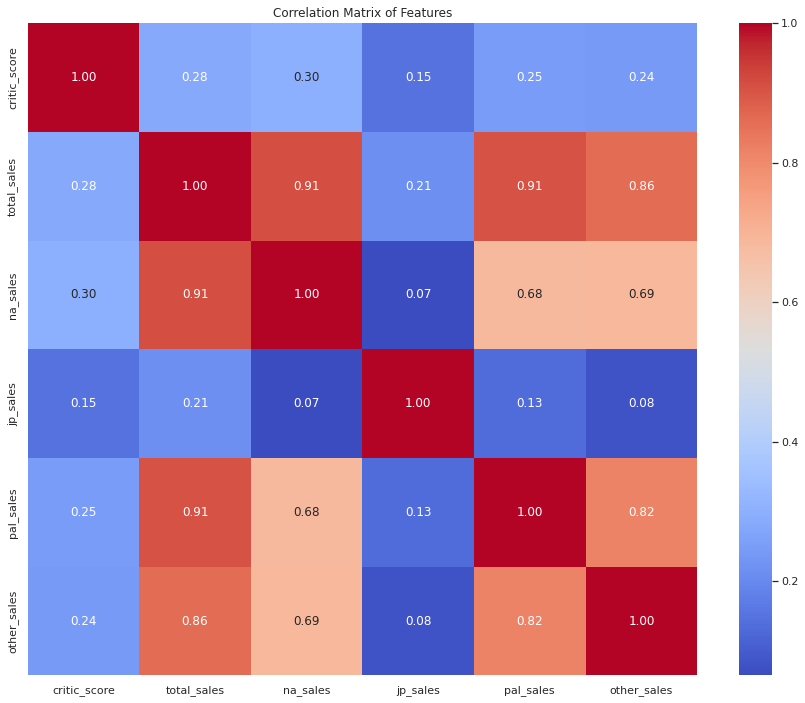

In [0]:
#Correlation Matrix
plt.figure(figsize=(15,12))
correlation_matrix = vgDF.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Interesting observations:
1) Why do NA/PAL/Other sales not correlate with jp sales???
2) Critic score does not correlate with any sales! Would be interested to see user scores
3) What are top japanese games vs total?

In [0]:
#Pairplots
selected_features = ['critic_score','total_sales','na_sales','jp_sales','pal_sales','other_sales']
sns.pairplot(vgDF,vars=selected_features)
plt.suptitle('Pairplot of Selected Features')
plt.show()

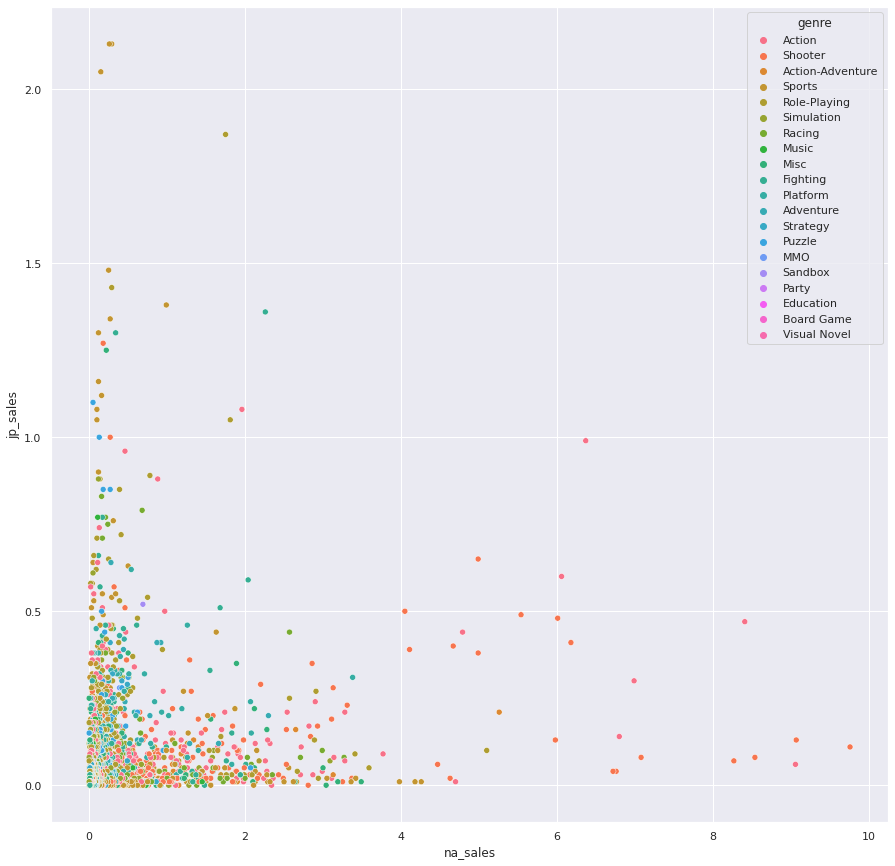

In [0]:
#Scatterplot
plt.figure(figsize=(15,15))
sns.scatterplot(x="na_sales",y="jp_sales",data=vgDF,hue="genre")
plt.show()

In [0]:
%sql
with rankedTitles as (
  select genre, title, jpSales, dense_rank() over (partition by genre order by jpSales desc) as genreRank
  from (select genre, title, sum(jp_sales) as jpSales
    from game_data
    where jp_sales is not NULL
    group by genre, title
    order by jpSales desc) as totalSales
)

select gd.genre, sum(gd.jp_sales) as japSales, rankedTitles.title, rankedTitles.genreRank, rankedTitles.jpSales
from game_data gd
join rankedTitles on gd.genre = rankedTitles.genre
group by gd.genre,rankedTitles.title, rankedTitles.genreRank, rankedTitles.jpSales
having rankedTitles.genreRank <=3
order by japSales desc






genre,japSales,title,genreRank,jpSales
Role-Playing,130.55999943055212,Final Fantasy XIII,1,1.8800000045448542
Role-Playing,130.55999943055212,Dragon Quest XI,2,1.8200000524520874
Role-Playing,130.55999943055212,Dragon Quest XI: Echoes of an Elusive Age,3,1.4299999475479126
Sports,109.26999980583787,Hot Shots Golf,1,4.260000228881836
Sports,109.26999980583787,R.B.I. Baseball,2,2.049999952316284
Sports,109.26999980583787,Famista '89 - Kaimaku Han!!,2,2.049999952316284
Sports,109.26999980583787,Hot Shots Golf 2,3,1.4800000190734863
Action,80.299999833107,Grand Theft Auto V,1,1.6600000318139791
Action,80.299999833107,Resident Evil 5,2,1.2100000400096178
Action,80.299999833107,Doraemon,3,1.149999976158142


In [0]:
%sql
with rankedTitles as (
  select genre, title, naSales, dense_rank() over (partition by genre order by naSales desc) as genreRank
  from (select genre, title, sum(na_sales) as naSales
    from game_data
    where na_sales is not NULL
    group by genre, title
    order by naSales desc) as totalSales
)

select gd.genre, sum(gd.na_sales) as namSales, rankedTitles.title, rankedTitles.genreRank, rankedTitles.naSales
from game_data gd
join rankedTitles on gd.genre = rankedTitles.genre
group by gd.genre,rankedTitles.title, rankedTitles.genreRank, rankedTitles.naSales
having rankedTitles.genreRank <=3
order by namSales desc

genre,namSales,title,genreRank,naSales
Sports,607.4700002931058,Madden NFL 06,1,7.68000003695488
Sports,607.4700002931058,Madden NFL 08,2,7.130000185221434
Sports,607.4700002931058,Madden NFL 2005,3,6.849999859929085
Action,589.6899991296232,Grand Theft Auto V,1,26.19000005722046
Action,589.6899991296232,Grand Theft Auto IV,2,11.600000152364373
Action,589.6899991296232,LEGO Star Wars: The Complete Saga,3,8.949999809265137
Shooter,528.269999852404,Call of Duty: Black Ops,1,17.6500004529953
Shooter,528.269999852404,Call of Duty: Modern Warfare 3,2,15.569999665021896
Shooter,528.269999852404,Call of Duty: Ghosts,3,15.060000270605087
Misc,295.65999914333224,Guitar Hero III: Legends of Rock,1,11.140000004321337


In [0]:
%sql
with rankedTitles as (
  select genre, title, palSales, dense_rank() over (partition by genre order by palSales desc) as genreRank
  from (select genre, title, sum(pal_sales) as palSales
    from game_data
    where pal_sales is not NULL
    group by genre, title
    order by palSales desc) as totalSales
)

select gd.genre, sum(gd.pal_sales) as euSales, rankedTitles.title, rankedTitles.genreRank, rankedTitles.palSales
from game_data gd
join rankedTitles on gd.genre = rankedTitles.genre
group by gd.genre,rankedTitles.title, rankedTitles.genreRank, rankedTitles.palSales
having rankedTitles.genreRank <=3
order by euSales desc

genre,euSales,title,genreRank,palSales
Action,342.51999931037426,Grand Theft Auto V,1,28.140000343322754
Action,342.51999931037426,Grand Theft Auto IV,2,7.6399999260902405
Action,342.51999931037426,Grand Theft Auto: Vice City,3,5.519999770447612
Sports,341.9199992790818,FIFA 15,1,12.44999971985817
Sports,341.9199992790818,FIFA 14,2,12.140000104904175
Sports,341.9199992790818,FIFA 17,3,12.069999933242798
Shooter,324.74000108242035,Call of Duty: Modern Warfare 3,1,11.260000184178352
Shooter,324.74000108242035,Call of Duty: Black Ops II,2,11.080000281333923
Shooter,324.74000108242035,Call of Duty: Black Ops 3,3,9.760000169277191
Racing,179.13999941572547,Need for Speed Underground 2,1,4.4099999740719795
